<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Tirta Nurrochman Bintang Prawira
# NIM: 2241720045
# No: 27
# Kelas: TI-3A

# D. TUGAS PRAKTIKUM
1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.
- Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- **`from google.colab import drive`**: Mengimpor modul untuk mengakses Google Drive.
- **`drive.mount('/content/drive')`**: Mengaitkan Google Drive ke direktori `/content/drive`. Anda akan diminta untuk otorisasi setelah menjalankan perintah ini.

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

1. **OpenCV (cv2)**: Digunakan untuk pemrosesan citra, termasuk membaca, menulis, dan menerapkan algoritma pengolahan citra.
  
2. **NumPy**: Digunakan untuk manipulasi array, memudahkan operasi matematis pada data citra.

3. **Matplotlib**: Digunakan untuk visualisasi data dan citra, memungkinkan Anda menampilkan gambar dan grafik.

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

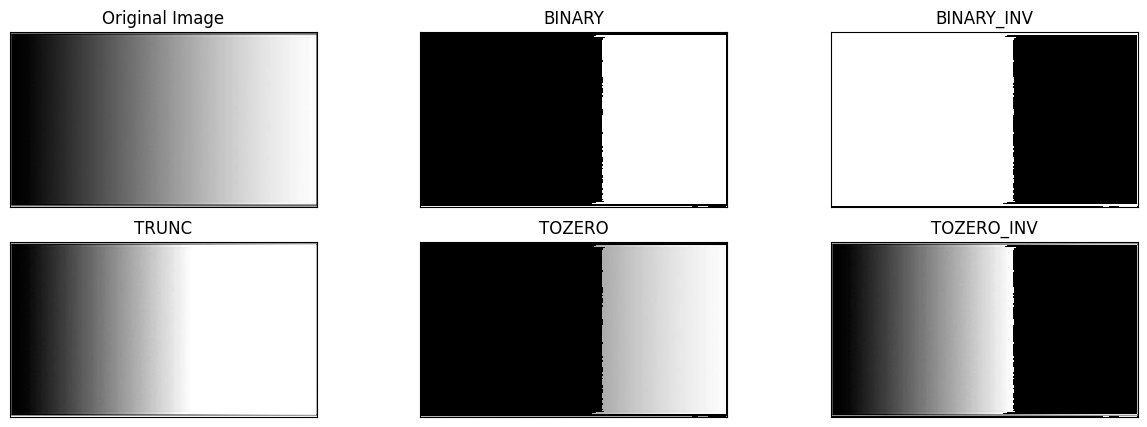

In [5]:
filename = ('/content/drive/MyDrive/dataset/Minggu8/gradientt.jpg')
img = cv.imread(filename)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Threshold level
thresh = 170

# Operasi threshold manual menggunakan np.where
binary = np.where(img_gray > thresh, 255, 0)
binary_inv = np.where(img_gray > thresh, 0, 255)
trunc = np.where(img_gray > thresh, thresh, img_gray)
tozero = np.where(img_gray > thresh, img_gray, 0)
tozero_inv = np.where(img_gray > thresh, 0, img_gray)

# Menampilkan hasil
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]
plt.figure(figsize=(15,5))

for i in range(len(images)):
    plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


### Penjelasan Kode
1. **Membaca Citra**: Gambar diambil dari path yang ditentukan dan diubah ke grayscale.
2. **Threshold Level**: Nilai threshold ditetapkan pada 170 untuk segmentasi.
3. **Operasi Threshold Manual**: Lima jenis operasi threshold dilakukan menggunakan `np.where`:
   - **BINARY**: Piksel yang lebih besar dari threshold diubah menjadi 255 (putih), lainnya menjadi 0 (hitam).
   - **BINARY_INV**: Kebalikan dari BINARY; piksel diubah menjadi 0 jika lebih besar dari threshold dan 255 sebaliknya.
   - **TRUNC**: Piksel yang lebih besar dari threshold diset menjadi threshold itu sendiri, sementara yang lainnya tetap.
   - **TOZERO**: Piksel yang lebih besar dari threshold tetap, yang lainnya diset menjadi 0.
   - **TOZERO_INV**: Kebalikan dari TOZERO; yang lebih besar dari threshold menjadi 0 dan yang lainnya tetap.
4. **Menampilkan Hasil**: Menggunakan `matplotlib` untuk menampilkan citra asli dan hasil dari lima operasi thresholding dalam satu figure.

### Output
- **Citra Asli**: Gambar grayscale dari input.
- **BINARY**: Menunjukkan citra biner dengan objek yang terlihat jelas.
- **BINARY_INV**: Menunjukkan citra biner terbalik.
- **TRUNC**: Menampilkan citra di mana nilai piksel di atas threshold dibatasi.
- **TOZERO**: Piksel di bawah threshold menjadi hitam, lainnya tetap.
- **TOZERO_INV**: Kebalikan dari TOZERO, menunjukkan piksel yang lebih besar dari threshold menjadi hitam.

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-9-990cc3d3d785>:18: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


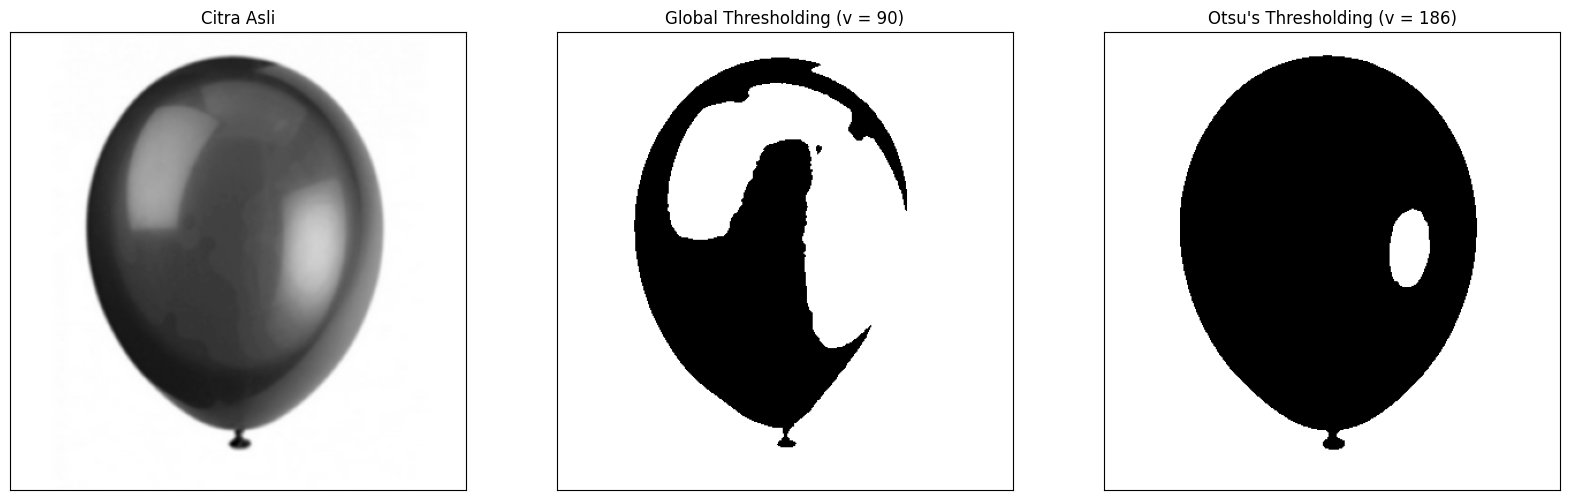

In [9]:
filename = ('/content/drive/MyDrive/dataset/Minggu8/ballon.png')
img = cv.imread(filename,0)
blur = cv. GaussianBlur (img, (5,5),0)

hist = cv.calcHist([blur],[0],None,[256], [0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1
for i in range(0,187):
  wb += hist[i]
  wf = (img.shape[0]*img.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i
x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blur, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt. figure(figsize = (20,15))
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Penjelasan Kode
1. **Membaca Citra**: Menggunakan OpenCV untuk membaca gambar balon dalam mode grayscale.
2. **Gaussian Blur**: Mengaplikasikan Gaussian blur untuk mengurangi noise.
3. **Histogram**: Menghitung histogram citra yang diblur dan mencari threshold optimal menggunakan metode Otsu.
4. **Thresholding**: Melakukan global thresholding dengan nilai 90 dan Otsu's thresholding.
5. **Menampilkan Hasil**: Menampilkan citra asli, hasil global thresholding, dan hasil Otsu's thresholding.

### Output
- **Citra Asli**: Menampilkan gambar balon.
- **Global Thresholding (v = 90)**: Menunjukkan hasil binarisasi dengan threshold tetap 90.
- **Otsu's Thresholding**: Menampilkan hasil binarisasi yang lebih baik dengan threshold yang ditentukan oleh metode Otsu.

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
- Petunjuk:
- anda dapat gunakan cv.calcHist untuk menampilkan histogram.
- Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
- Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

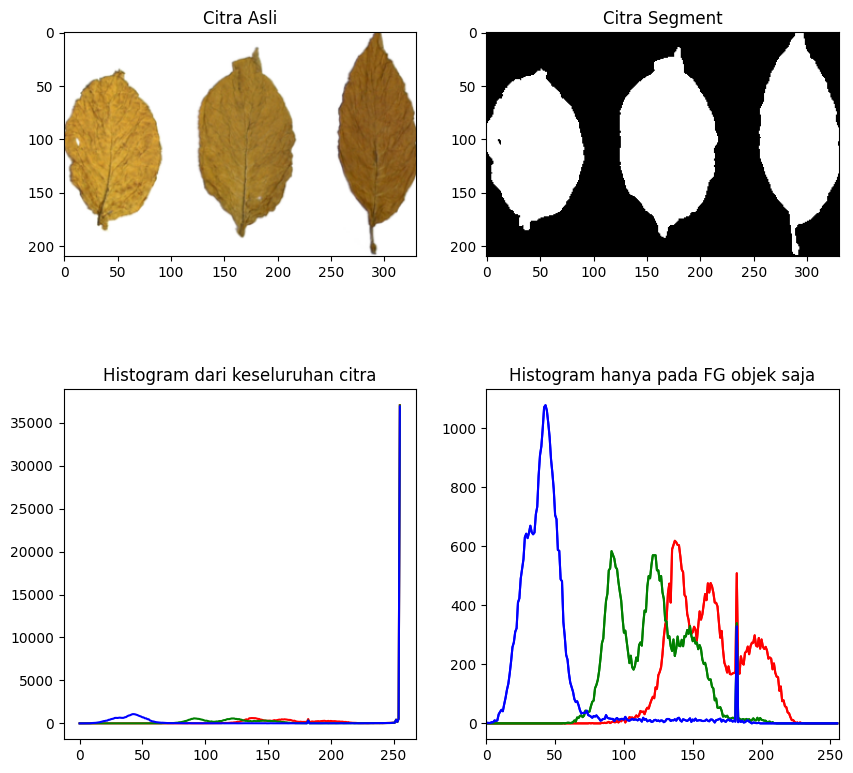

In [10]:
filename = ('/content/drive/MyDrive/dataset/Minggu8/tobacco.png')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
thresh = 200

ret,mask = cv.threshold(img_gray,thresh,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

### Penjelasan Kode Program
1. **Pembacaan dan Konversi Citra**:
   - Gambar dibaca dari file dan diubah menjadi format RGB dan grayscale.
2. **Thresholding**:
   - Thresholding diterapkan pada citra grayscale menggunakan nilai ambang (threshold) 200 untuk menghasilkan **citra segmentasi**. Piksel di bawah nilai ini menjadi putih (foreground), sedangkan yang lainnya menjadi hitam (background).
3. **Histogram**:
   - Histogram dihitung untuk keseluruhan citra dan juga hanya untuk objek foreground menggunakan **mask** yang dihasilkan dari thresholding.

### Output Gambar
- **Citra Asli**: Menampilkan citra daun dengan warna yang terlihat jelas.
- **Citra Segment**: Menunjukkan hasil segmentasi, di mana objek foreground (daun) tampak putih di atas latar belakang hitam.
- **Histogram dari Keseluruhan Citra**: Menampilkan distribusi intensitas warna (RGB) dari seluruh citra.
- **Histogram Hanya pada FG Objek Saja**: Menunjukkan distribusi intensitas warna untuk piksel yang tersegmentasi sebagai foreground.

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f217c1bbdc0>)

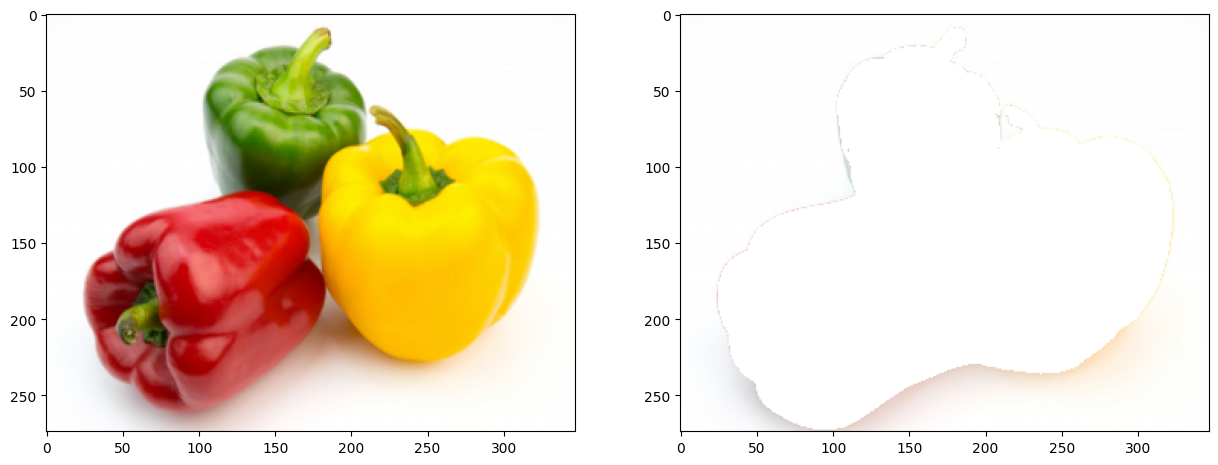

In [11]:
filename = ('/content/drive/MyDrive/dataset/Minggu8/peppers.jpg')
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

labels = labels.flatten()
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)

1. **Pemilihan cluster yang salah**:
   Hal ini terjadi karena K-Means mengelompokkan piksel gambar berdasarkan kesamaan warna dalam ruang 3D (RGB). Warna kuning terpilih dari cluster yang diwakili oleh label 1, namun warna lain (merah dan hijau) berada di cluster berbeda. Karena kode hanya menampilkan cluster dengan label 1, warna merah dan hijau dianggap "salah" dan diganti dengan putih. Algoritma K-Means tidak memahami konteks objek atau warna spesifik yang kita inginkan, melainkan hanya berdasarkan distribusi piksel, sehingga warna yang kita harapkan bisa tidak terpilih.

2. **Nilai k yang kurang tepat**:
   Nilai k=6 membagi gambar menjadi 6 kelompok warna, yang bisa terlalu sedikit atau terlalu banyak, tergantung pada variasi warna di gambar. Jika k terlalu besar, warna yang seharusnya berada dalam satu cluster bisa terpecah menjadi beberapa cluster yang berbeda. Sebaliknya, jika k terlalu kecil, warna yang berbeda bisa tergabung dalam satu cluster. Ini menyebabkan warna yang ingin ditampilkan mungkin tidak masuk dalam cluster yang dipilih. Pemilihan k yang tepat bergantung pada jumlah warna dominan dalam gambar.

3. **K-Means acak**:
   K-Means menggunakan inisialisasi acak untuk menentukan posisi awal cluster center. Karena itu, hasil clustering bisa berbeda setiap kali dijalankan, tergantung pada titik awal yang dipilih secara acak. Ini menyebabkan warna yang dikelompokkan dalam cluster tertentu bisa berbeda di setiap iterasi, sehingga warna yang muncul atau hilang bisa bervariasi. Untuk mengurangi variasi ini, biasanya digunakan beberapa kali pengulangan (seperti 10 kali pada kode di atas) agar hasil lebih stabil.

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

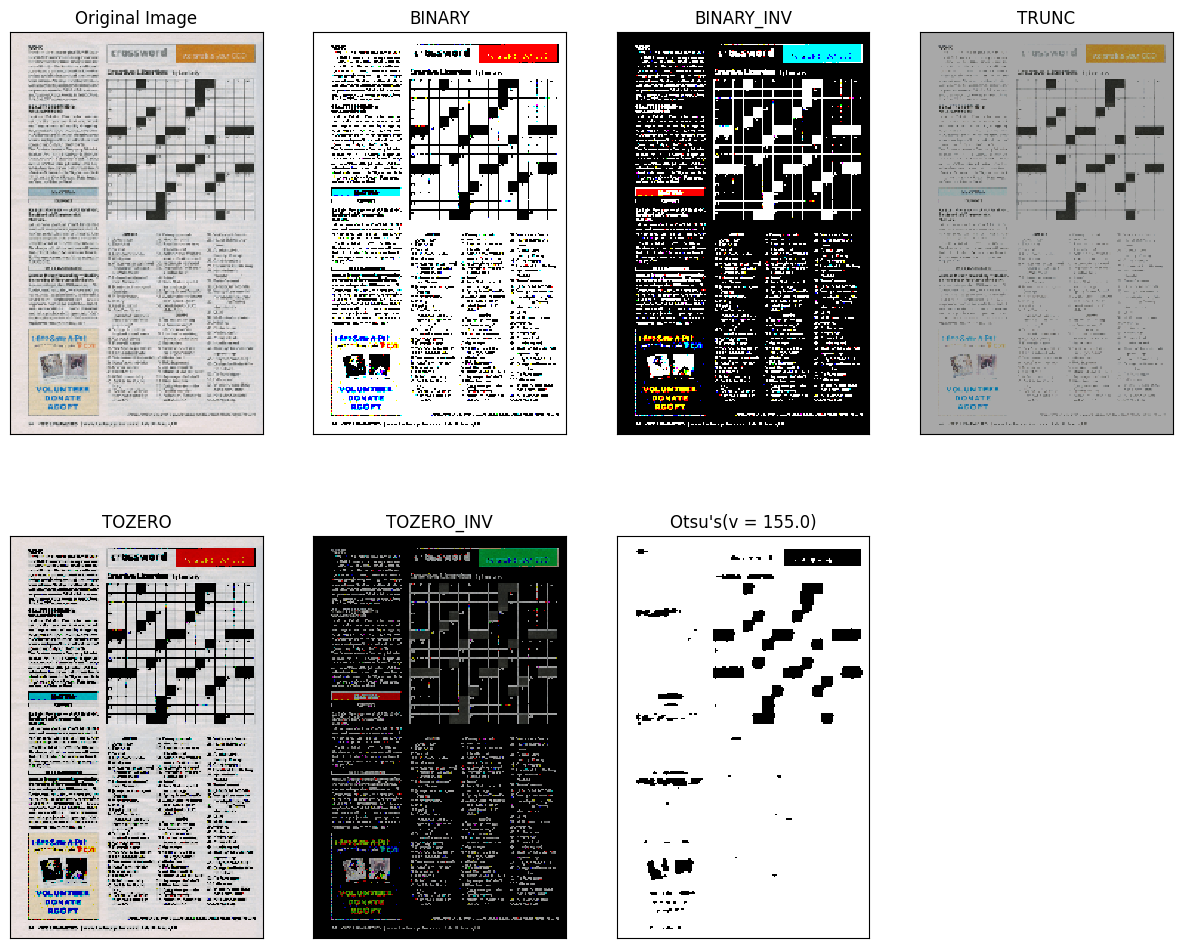

In [12]:
filename = ('/content/drive/MyDrive/dataset/Minggu8/crossword.png')
img = cv.imread(filename)
img_gray= cv.cvtColor(img, cv.COLOR_RGB2GRAY)
blur = cv.GaussianBlur(img_gray,(5,5),0)
thresh = 168

ret, thresh1 = cv.threshold(img, thresh,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, thresh,255,cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, thresh,255,cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, thresh,255,cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, thresh,255,cv.THRESH_TOZERO_INV)
ret2, th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's(v = ") + str(ret2)+")"
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV',x]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5,th2]

plt.figure(figsize = (15,12))

for i in range(len(images)):
  plt.subplot(2,4,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

### Penjelasan Kode Program
1. **Pembacaan Citra**: Gambar dibaca dan diubah menjadi grayscale, kemudian diberi Gaussian blur untuk mengurangi noise.
2. **Thresholding**:
   - **BINARY**: Piksel di atas threshold (168) menjadi putih, yang lainnya hitam.
   - **BINARY_INV**: Kebalikan dari BINARY, piksel di atas threshold menjadi hitam.
   - **TRUNC**: Piksel di atas threshold diatur ke nilai threshold.
   - **TOZERO**: Piksel di atas threshold tetap, yang lainnya menjadi 0.
   - **TOZERO_INV**: Kebalikan dari TOZERO.
3. **Otsu’s Thresholding**: Menghitung threshold otomatis untuk segmentasi optimal.

### Penjelasan Hasil Gambar
- **Original Image**: Gambar asli dengan teks dan grafik.
- **BINARY**: Kontras tinggi dengan teks jelas di atas latar belakang putih.
- **BINARY_INV**: Teks putih di atas latar belakang hitam.
- **TRUNC**: Mengurangi pencahayaan berlebih.
- **TOZERO**: Mempertahankan rincian pada area terang.
- **TOZERO_INV**: Mempertahankan rincian pada area gelap.
- **Otsu’s Thresholding**: Menghasilkan segmentasi lebih baik dengan threshold otomatis.

--- SELAMAT BELAJAR ---